In [2]:
import gensim
from gensim.models import Word2Vec
import sklearn
from sklearn.decomposition import PCA as PCA
import matplotlib.pyplot as plt
import time
import re
from gensim.models.phrases import Phrases,Phraser
from spacy.lang.en.stop_words import STOP_WORDS
import numpy as np 
from gensim.utils import simple_preprocess as pre_process
from nltk import word_tokenize 
from nltk.util import ngrams
from nltk.tokenize.treebank import TreebankWordDetokenizer
from gensim.models import FastText

In [71]:
#### Reading the combibned processed text file as a list of queries ####
queries = open("everything_combined_processed.txt").readlines()

In [ ]:
#### Tokenizing each query in the corpus ####
for i in range(0,len(queries)):
    queries[i] = word_tokenize(queries[i])

In [29]:
queries[0]

['serosal',
 'mass',
 'involving',
 'descending',
 'colon',
 '(',
 '2',
 ':',
 '60',
 ')',
 'measures',
 '3',
 '.',
 '5']

In [5]:
#### Defining a function which identifies meaningful phrases of length 2(bigrams) #####
def build_phrases(query):
    phrases = Phrases(query,min_count=1,threshold=1,progress_per=10)
    return Phraser(phrases)

In [6]:
#### Building the bigrams ####
model = build_phrases(queries)

In [7]:
#### Function for building Bigrams with each sentence ####
def sentence_to_bi_grams(phrases_model, sentence):
    return ' '.join(phrases_model[sentence])

In [8]:
##### Writing each query with identified bigrams to a new text file ####
with open("/Users/harshitg/github/autocomplete/autocomplete/everything_combined_processed_bigrams.txt",'w') as outfile:
    for query in queries:
        parsed_sentence = sentence_to_bi_grams(model,query)
        outfile.write(parsed_sentence + '\n')

In [73]:
queries = open("everything_combined_bigrams.txt").readlines()

In [74]:
queries[0]

'serosal mass involving descending_colon (_2 : 60 ) measures_3 . 5\n'

As is visible from the above tokenized sentence, descending colon has been identified as a meaningful bigram (separated by an underscore).

In [75]:
for i in range(0,len(queries)):
    queries[i]= word_tokenize(queries[i])

In [61]:
queries[0]

'serosal mass involving the descending colon  2 : 60  measures 3 . 5\n'

In [44]:
#### Training Word2vec on this previous queries ####
bigrams_model =  FastText(queries,window = 5,min_count = 1,sg=0)

In [47]:
### Saving the model #####
bigrams_model.save("bigrams__cb.model")

In [76]:
bigrams_model = Word2Vec.load("bigrams_fasttext_cb.model")

In [77]:
#### Printing the vector representation of a bigram ####
print(bigrams_model.wv['proximal_sigmoid'])

[ 2.9398263e-01  2.2869018e-01 -2.4424589e-01  2.8035593e-01
  7.1002060e-01 -1.7484673e+00  8.1952614e-01  1.0041624e-01
  1.4839664e+00  3.9427698e-01 -4.1535690e-01 -2.3916957e-01
 -5.8943577e-02 -2.0882060e-01 -2.9235739e-01  4.2261007e-01
  7.0561981e-01  5.3352648e-01  2.8419352e-01 -2.6172072e-01
 -3.4684369e-01  8.4968418e-01 -1.0251101e+00  7.8193611e-01
  3.8080469e-01  5.1564045e-02  7.9378152e-01 -2.3737794e-01
  7.4397677e-01 -6.4703065e-01 -7.8252989e-01  2.3326136e-01
 -1.3114824e+00  4.3023342e-01  9.1482884e-01  9.1439319e-01
 -1.1539119e+00 -2.4558423e-01 -9.3444747e-01  5.1462418e-01
  8.8148159e-01 -1.7363229e-01 -1.3122155e-03 -7.6391143e-01
 -3.9894956e-01  2.9081970e-01 -1.5554950e+00  1.3698813e+00
 -8.7396991e-01  1.7820205e-01  7.5780302e-01 -2.6509321e-01
 -2.3824802e-01 -5.8659661e-01  9.6731067e-02 -8.9293730e-01
  5.8331484e-01 -1.6732587e+00 -3.5151672e-01  3.6086136e-01
 -6.5307194e-01 -1.2960866e-01 -2.7965626e-01  1.4978275e-01
 -5.5564028e-01  9.46951

In [78]:
### Prinint the most similar bigrams/words to a specific bigram ####
print(bigrams_model.most_similar(positive=["proximal_sigmoid"], topn=10))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('duodenum_proximal', 0.9763146638870239), ('proximal_duodenum', 0.9727161526679993), ('esophagus_proximal', 0.9684680104255676), ('proximal_lobar', 0.9679692983627319), ('proximal_loops', 0.9671614170074463), ('proximal_esophagus', 0.965828537940979), ('proximal_jejunum', 0.9642205834388733), ('colon_proximal', 0.9639400243759155), ('proximal_small', 0.9625846147537231), ('proximal_end', 0.9615644812583923)]


In [48]:
#### Reading combined processed file again for single word semantic search #####
queries = open("everything_combined_single.txt").readlines()

In [49]:
huge_list= []
for query in queries:
    tokenized = word_tokenize(query)
    huge_list.append(tokenized)

In [50]:
start = time.time()
model = FastText(huge_list,window = 5, min_count = 1,sg = 0)
end = time.time()
print('Elapsed time =', end - start)

Elapsed time = 99.29134106636047


In [51]:
print(model.wv['heart'])

[ 3.420536   -3.4354692  -2.8876958  -0.6155115  -3.006259    0.07259812
 -1.4915453  -1.3511808   0.16070764 -1.7716211  -3.5486631  -3.7847357
  0.8366317  -1.7103089  -0.45212424  0.5313585  -0.48870736 -0.20360988
  0.26876968 -0.1602364  -0.09660383 -0.03581152  2.2900343   0.90395916
 -1.1664726   1.0105821   2.3899522   1.139368   -3.1534777  -1.2773952
  3.1618447   3.989536   -4.01674    -2.1154428  -3.828448   -1.8198965
  1.0416085  -1.3158141  -1.3435928   0.45038593 -0.27076113 -2.6312263
 -2.9777672   1.6937846   0.44017124 -0.7538776   1.7860663   3.3974776
 -3.6856263  -2.9800355  -0.01844155  5.842957    0.7254017   1.6006609
  0.32051373 -0.9979853  -0.55781734  0.8995269  -3.1831903  -1.5285957
  3.751249   -2.6748064   5.698632    0.8792953  -3.0680983   1.4444983
 -1.1223909   1.661587    2.110249    0.14847372  0.7719743  -1.3230959
  2.4153526  -4.090062   -4.787604   -2.220732   -6.035353   -2.758228
  0.13415118  3.4577703   1.017613   -5.7011714   1.3318691  -

In [52]:
model.save('fasttext_single_cb.model')

In [10]:
model = Word2Vec.load("word2vec_all_cb.model")

In [73]:
v1 = model.wv['practitioner']
print(v1)
print(np.shape(v1))

[ 0.22296417 -0.06923761  0.06649919  0.15423726 -0.05315606 -0.12052473
  0.08408515  0.08620808 -0.00635258  0.20327255  0.10297593 -0.13964476
  0.02094202  0.04342255  0.0379218  -0.13234355 -0.01604047  0.11950275
  0.02935185 -0.10636435 -0.00516597  0.05075892  0.05570708 -0.03147367
 -0.00054929 -0.0939415  -0.00627612  0.15976903  0.13037714  0.17251872
 -0.15808961  0.00033807  0.07819501 -0.02209914  0.16969036  0.07585953
  0.24208546  0.06756029  0.05155217  0.23618105  0.10230487 -0.09987095
  0.0691976   0.09833642 -0.01467339  0.01763299 -0.03958893 -0.1169088
  0.06811164 -0.08929353 -0.00889841 -0.04303502 -0.06862098 -0.07761838
  0.03006951  0.11370642  0.13068198  0.07112627  0.04005881  0.04412499
  0.00432402  0.23699668 -0.01548312  0.00910275 -0.06403875 -0.05246764
  0.17082943 -0.09608734 -0.08686344 -0.0618016   0.01828283 -0.01764082
 -0.18010941  0.01803583 -0.14541464  0.10502621 -0.04767568  0.04819887
 -0.03158207  0.12052757 -0.13619345  0.00195954 -0.

In [7]:
X = model[model.wv.vocab]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [11]:
model.most_similar(positive=["sigmoid"], topn=10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('rectosigmoid', 0.9016216397285461),
 ('polyps', 0.8963004350662231),
 ('colonic', 0.8833363056182861),
 ('polyp', 0.8720139265060425),
 ('volvulus', 0.8568389415740967),
 ('cecal', 0.856105387210846),
 ('transverse', 0.841758131980896),
 ('angioectasia', 0.8372659683227539),
 ('cecum', 0.8348032236099243),
 ('perforated', 0.8329482078552246)]

In [9]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

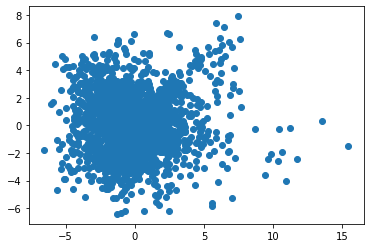

In [10]:
#### Plotting all the different vector representations of the words in the vector space #####
plt.scatter(result[:, 0], result[:, 1])

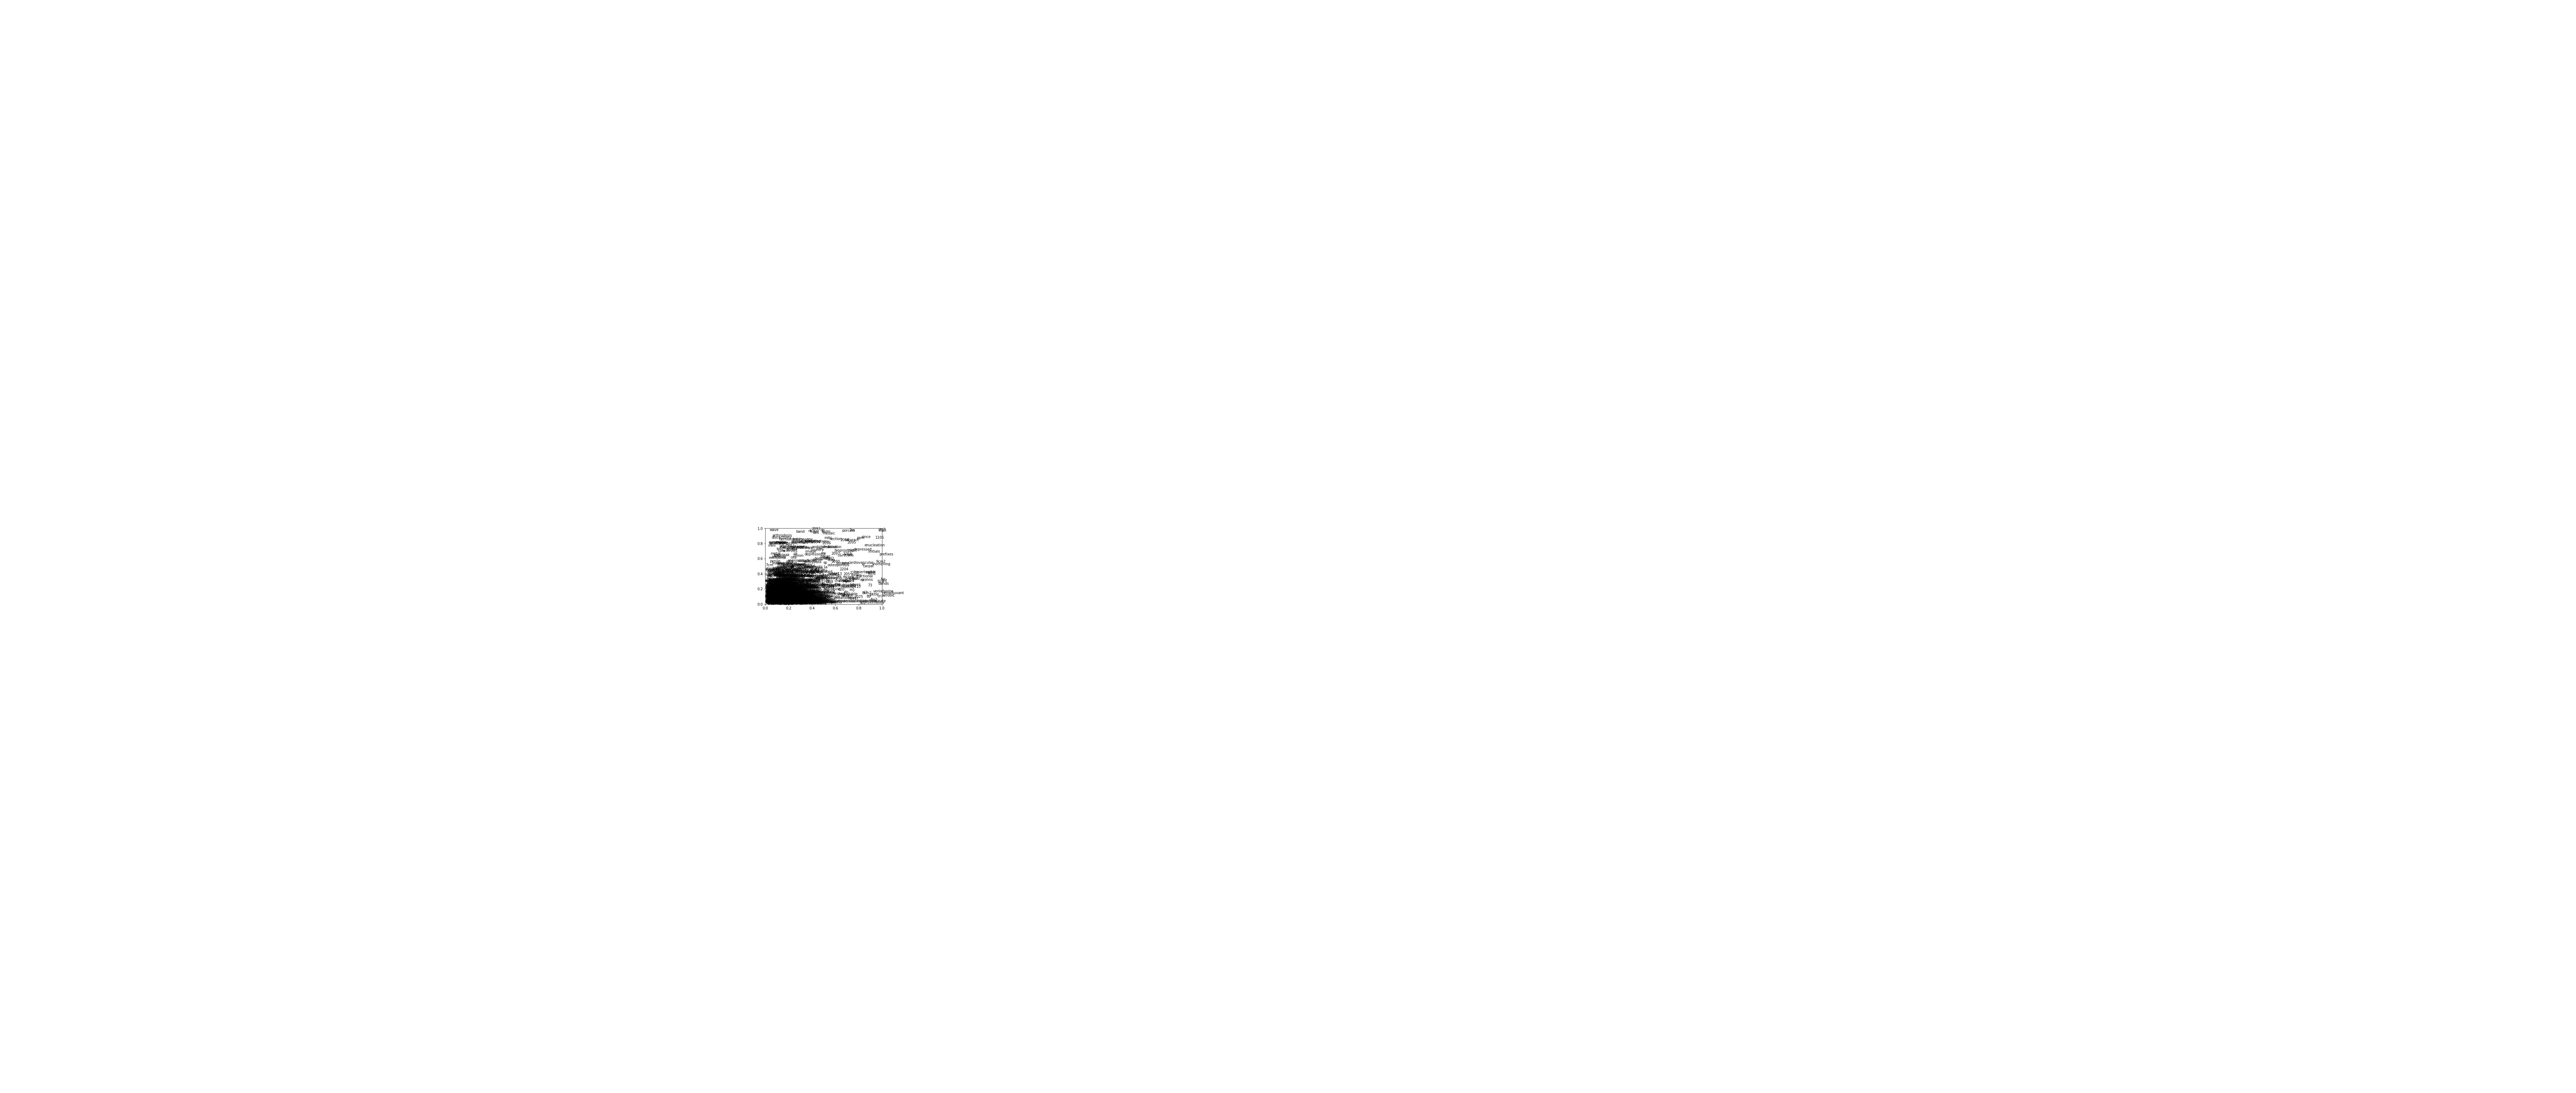

<Figure size 1440x720 with 0 Axes>

In [11]:
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.figure(figsize=(20,10))
plt.show()